In [1]:
import sys
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math


In [2]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler


In [4]:
from google.colab import files
files.upload()

Saving carbondatafinal.csv to carbondatafinal.csv


{'carbondatafinal.csv': b'Date,Price,Open,High,Low,Vol.,Returns\r\n1/2/2020,24.9,24.9,24.9,24.9,0.07K,-0.0111\r\n1/3/2020,25.5,25.34,25.37,25.34,0.01K,0.0241\r\n1/6/2020,24.74,24.95,24.96,24.7,0.02K,-0.0298\r\n1/7/2020,25.06,24.59,24.85,24.59,0.02K,0.0129\r\n1/8/2020,24.6,24.88,24.88,24.57,0.51K,-0.0184\r\n1/9/2020,25.2,24.84,25.2,24.84,0.12K,0.0244\r\n1/10/2020,24.73,24.82,24.82,24.71,0.06K,-0.0187\r\n1/13/2020,24.66,24.55,24.73,24.55,0.11K,-0.0028\r\n1/14/2020,24.37,24.28,24.33,24.2,0.06K,-0.0118\r\n1/15/2020,25.04,24.95,25.08,24.82,1.20K,0.0275\r\n1/16/2020,25.37,25.44,25.44,25.12,0.12K,0.0132\r\n1/17/2020,25.97,25.46,25.81,25.46,0.05K,0.0236\r\n1/20/2020,25.7,25.81,26.1,25.7,0.57K,-0.0104\r\n1/21/2020,25.45,25.55,25.95,25.42,0.15K,-0.0097\r\n1/22/2020,25.55,25.82,26.08,25.52,0.19K,0.0039\r\n1/23/2020,25.21,25.34,25.34,24.88,2.48K,-0.0133\r\n1/24/2020,24.87,25.33,25.33,24.8,0.46K,-0.0135\r\n1/27/2020,25.05,24.7,24.88,24.6,0.08K,0.0072\r\n1/28/2020,25.1,25.05,25.05,25.05,0.01K,0.002\

In [5]:
df = pd.read_csv('carbondatafinal.csv')
df

,Date,Price,Open,High,Low,Vol.,Returns
0,1/2/2020,24.90,24.90,24.90,24.90,0.07K,-0.0111
1,1/3/2020,25.50,25.34,25.37,25.34,0.01K,0.0241
2,1/6/2020,24.74,24.95,24.96,24.70,0.02K,-0.0298
3,1/7/2020,25.06,24.59,24.85,24.59,0.02K,0.0129
4,1/8/2020,24.60,24.88,24.88,24.57,0.51K,-0.0184
...,...,...,...,...,...,...,...
1072,2/29/2024,56.44,57.53,57.81,55.25,27.04K,-0.0135
1073,3/1/2024,56.31,56.50,56.84,55.08,22.85K,-0.0023
1074,3/4/2024,57.28,56.40,57.77,53.50,33.98K,0.0172
1075,3/5/2024,60.00,57.28,61.23,56.73,48.66K,0.0475


In [6]:
historical_data = pd.DataFrame(df)
historical_data

,Date,Price,Open,High,Low,Vol.,Returns
0,1/2/2020,24.90,24.90,24.90,24.90,0.07K,-0.0111
1,1/3/2020,25.50,25.34,25.37,25.34,0.01K,0.0241
2,1/6/2020,24.74,24.95,24.96,24.70,0.02K,-0.0298
3,1/7/2020,25.06,24.59,24.85,24.59,0.02K,0.0129
4,1/8/2020,24.60,24.88,24.88,24.57,0.51K,-0.0184
...,...,...,...,...,...,...,...
1072,2/29/2024,56.44,57.53,57.81,55.25,27.04K,-0.0135
1073,3/1/2024,56.31,56.50,56.84,55.08,22.85K,-0.0023
1074,3/4/2024,57.28,56.40,57.77,53.50,33.98K,0.0172
1075,3/5/2024,60.00,57.28,61.23,56.73,48.66K,0.0475


In [7]:
historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%m/%d/%Y')

In [8]:
filtered_dates = historical_data[historical_data['Date'].dt.year.between(2021, 2023)]

In [9]:
filtered_dates = filtered_dates.set_index('Date')

In [10]:
print(filtered_dates)

            Price   Open   High    Low   Vol.  Returns
Date                                                  
2021-01-04  33.89  33.14  34.45  33.14  1.25K   0.0288
2021-01-05  33.15  33.69  33.83  32.96  1.28K  -0.0218
2021-01-06  33.83  33.71  33.88  33.02  0.43K   0.0205
2021-01-07  34.97  34.05  35.00  34.05  1.17K   0.0337
2021-01-08  35.14  35.21  35.35  34.55  1.60K   0.0049
...           ...    ...    ...    ...    ...      ...
2023-12-21  75.88  73.50  76.42  73.50  0.82K   0.0366
2023-12-22  76.94  75.88  77.08  75.00  0.45K   0.0140
2023-12-27  77.74  77.27  78.57  77.08  0.96K   0.0104
2023-12-28  77.94  77.69  78.02  76.98  0.94K   0.0026
2023-12-29  77.98  78.00  78.61  77.28      0   0.0005

[772 rows x 6 columns]


In [11]:
filtered_dates = filtered_dates.drop('Vol.', axis=1)

In [12]:
filtered_dates

,Price,Open,High,Low,Returns
Date,,,,,
2021-01-04,33.89,33.14,34.45,33.14,0.0288
2021-01-05,33.15,33.69,33.83,32.96,-0.0218
2021-01-06,33.83,33.71,33.88,33.02,0.0205
2021-01-07,34.97,34.05,35.00,34.05,0.0337
2021-01-08,35.14,35.21,35.35,34.55,0.0049
...,...,...,...,...,...
2023-12-21,75.88,73.50,76.42,73.50,0.0366
2023-12-22,76.94,75.88,77.08,75.00,0.0140
2023-12-27,77.74,77.27,78.57,77.08,0.0104


In [13]:
skewness = filtered_dates['Price'].skew()
kurt = filtered_dates['Price'].kurtosis()

In [14]:
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.8039572982504304
Kurtosis: -0.43035776152484573


In [15]:
filtered_dates['volatility'] = filtered_dates['Returns'].rolling(window=30).std()

In [16]:
filtered_dates

,Price,Open,High,Low,Returns,volatility
Date,,,,,,
2021-01-04,33.89,33.14,34.45,33.14,0.0288,NaN
2021-01-05,33.15,33.69,33.83,32.96,-0.0218,NaN
2021-01-06,33.83,33.71,33.88,33.02,0.0205,NaN
2021-01-07,34.97,34.05,35.00,34.05,0.0337,NaN
2021-01-08,35.14,35.21,35.35,34.55,0.0049,NaN
...,...,...,...,...,...,...
2023-12-21,75.88,73.50,76.42,73.50,0.0366,0.022594
2023-12-22,76.94,75.88,77.08,75.00,0.0140,0.022559
2023-12-27,77.74,77.27,78.57,77.08,0.0104,0.022374


In [17]:
filtered_dates = filtered_dates.dropna()
filtered_dates

,Price,Open,High,Low,Returns,volatility
Date,,,,,,
2021-02-12,40.28,38.61,40.50,37.40,0.0328,0.027987
2021-02-15,39.81,40.18,40.88,39.73,-0.0117,0.027881
2021-02-16,39.13,39.85,40.79,39.10,-0.0171,0.027734
2021-02-17,38.40,39.25,39.66,38.35,-0.0187,0.027946
2021-02-18,38.61,38.88,38.88,38.18,0.0055,0.027402
...,...,...,...,...,...,...
2023-12-21,75.88,73.50,76.42,73.50,0.0366,0.022594
2023-12-22,76.94,75.88,77.08,75.00,0.0140,0.022559
2023-12-27,77.74,77.27,78.57,77.08,0.0104,0.022374


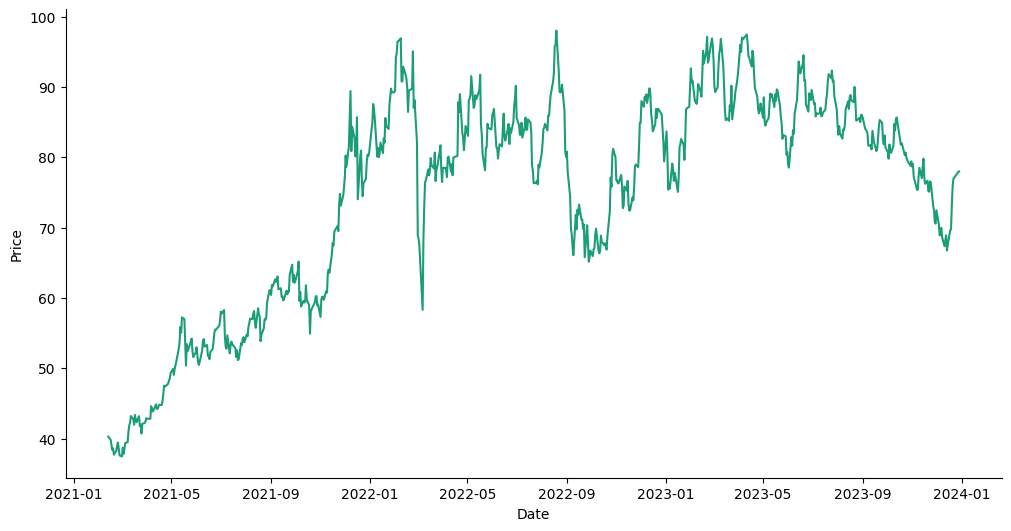

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_dates.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

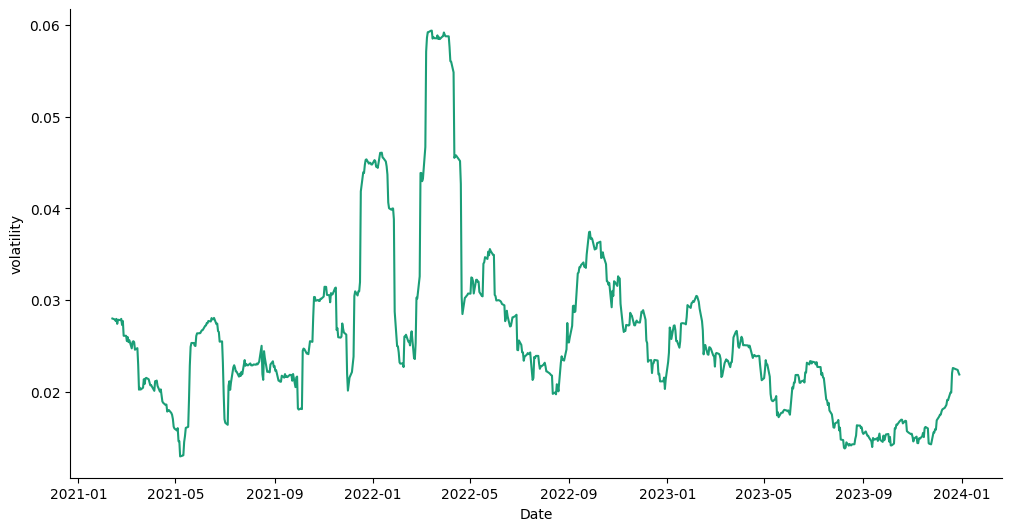

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = series['volatility']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_dates.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('volatility')

In [20]:
import plotly.graph_objs as go

In [21]:
fig = go.Figure()

candlestick_trace = go.Candlestick(x=filtered_dates.index,
                                   open=filtered_dates['Open'],
                                   high=filtered_dates['High'],
                                   low=filtered_dates['Low'],
                                   close=filtered_dates['Price'])

fig.add_trace(candlestick_trace)

fig.update_xaxes(type='category')
fig.update_layout(title='Carbon Emissions Futures Historical Data (CFI2Z4)',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd



In [23]:
print(filtered_dates)

            Price   Open   High    Low  Returns  volatility
Date                                                       
2021-02-12  40.28  38.61  40.50  37.40   0.0328    0.027987
2021-02-15  39.81  40.18  40.88  39.73  -0.0117    0.027881
2021-02-16  39.13  39.85  40.79  39.10  -0.0171    0.027734
2021-02-17  38.40  39.25  39.66  38.35  -0.0187    0.027946
2021-02-18  38.61  38.88  38.88  38.18   0.0055    0.027402
...           ...    ...    ...    ...      ...         ...
2023-12-21  75.88  73.50  76.42  73.50   0.0366    0.022594
2023-12-22  76.94  75.88  77.08  75.00   0.0140    0.022559
2023-12-27  77.74  77.27  78.57  77.08   0.0104    0.022374
2023-12-28  77.94  77.69  78.02  76.98   0.0026    0.022079
2023-12-29  77.98  78.00  78.61  77.28   0.0005    0.021879

[743 rows x 6 columns]


In [24]:
# Define a starting date for reference
start_date = pd.to_datetime('2021-02-12')

In [25]:
print(filtered_dates)

            Price   Open   High    Low  Returns  volatility
Date                                                       
2021-02-12  40.28  38.61  40.50  37.40   0.0328    0.027987
2021-02-15  39.81  40.18  40.88  39.73  -0.0117    0.027881
2021-02-16  39.13  39.85  40.79  39.10  -0.0171    0.027734
2021-02-17  38.40  39.25  39.66  38.35  -0.0187    0.027946
2021-02-18  38.61  38.88  38.88  38.18   0.0055    0.027402
...           ...    ...    ...    ...      ...         ...
2023-12-21  75.88  73.50  76.42  73.50   0.0366    0.022594
2023-12-22  76.94  75.88  77.08  75.00   0.0140    0.022559
2023-12-27  77.74  77.27  78.57  77.08   0.0104    0.022374
2023-12-28  77.94  77.69  78.02  76.98   0.0026    0.022079
2023-12-29  77.98  78.00  78.61  77.28   0.0005    0.021879

[743 rows x 6 columns]


In [26]:
# Sort the data by Date
filtered_dates = filtered_dates.sort_values('Date')

In [27]:
# Set the threshold indices for the splits
train_size = int(0.8 * len(filtered_dates))
test_size = len(filtered_dates) - train_size

In [28]:
# Split the data
train_data = filtered_dates[:train_size]
test_data = filtered_dates[train_size:]

In [29]:
X_train = train_data[['Open', 'High', 'Low', 'Returns', 'volatility']].values  # Extract features for training data
y_train = train_data['Price'].values  # Extract labels for training data

X_test = test_data[['Open', 'High', 'Low', 'Returns', 'volatility']].values  # Extract features for test data
y_test = test_data['Price'].values  # Extract labels for test data

In [30]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train)


SVR()

In [31]:
svr_rbf.score(X_test,y_test)

0.9631743008079651

In [32]:
 svr_prediction = svr_rbf.predict(X_test)
 svr_prediction

array([80.17684781, 80.99827448, 82.86187513, 82.70212825, 84.34282342,
       85.29183836, 86.70137819, 88.22773531, 90.14802877, 91.21791787,
       90.47425338, 90.35593143, 91.61092438, 91.13402264, 89.04203298,
       88.88197918, 87.51494791, 87.11554167, 88.20097792, 87.59037723,
       87.92078654, 88.19005855, 87.2458072 , 86.67400707, 86.01851064,
       86.65454241, 86.37628438, 86.32086584, 86.94967781, 86.20330474,
       86.54468004, 86.13218345, 87.06115425, 87.84695851, 88.94073384,
       89.90651326, 90.18207391, 90.21866588, 90.42351379, 89.38787214,
       89.04840268, 87.71124951, 86.3976857 , 84.62718152, 84.58320484,
       84.996243  , 84.09232951, 83.78067572, 84.97076095, 84.60952127,
       85.5884578 , 86.8925687 , 87.55356042, 87.69883971, 88.24409754,
       87.931331  , 87.70012739, 88.25813908, 88.49314159, 86.5651323 ,
       85.62277124, 85.8086344 , 85.79432559, 85.69571944, 86.42531931,
       85.95243693, 85.27697483, 84.64656388, 84.44026216, 84.06

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# Assuming  svr_prediction and y_test are your predicted and true values, respectively
mse = mean_squared_error(y_test, svr_prediction)
mae = mean_absolute_error(y_test, svr_prediction)
r2 = r2_score(y_test,  svr_prediction)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - svr_prediction) / y_test)) * 100

In [35]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f'MAPE: {mape:.2f}%')

Mean Squared Error: 1.4800253043593021
Mean Absolute Error: 1.0100783627020409
R-squared: 0.9631743008079651
Root Mean Squared Error: 1.2165629060427998
MAPE: 1.23%


In [36]:
filtered_dates

,Price,Open,High,Low,Returns,volatility
Date,,,,,,
2021-02-12,40.28,38.61,40.50,37.40,0.0328,0.027987
2021-02-15,39.81,40.18,40.88,39.73,-0.0117,0.027881
2021-02-16,39.13,39.85,40.79,39.10,-0.0171,0.027734
2021-02-17,38.40,39.25,39.66,38.35,-0.0187,0.027946
2021-02-18,38.61,38.88,38.88,38.18,0.0055,0.027402
...,...,...,...,...,...,...
2023-12-21,75.88,73.50,76.42,73.50,0.0366,0.022594
2023-12-22,76.94,75.88,77.08,75.00,0.0140,0.022559
2023-12-27,77.74,77.27,78.57,77.08,0.0104,0.022374


In [38]:
latest_dates = filtered_dates[-30:]
latest_dates

,Price,Open,High,Low,Returns,volatility
Date,,,,,,
2023-11-16,77.20,79.80,79.89,76.49,-0.0326,0.016033
2023-11-17,76.23,77.09,77.68,76.02,-0.0126,0.016161
2023-11-20,76.66,76.63,77.80,76.15,0.0056,0.016000
2023-11-21,75.21,76.61,76.71,75.08,-0.0189,0.014380
2023-11-22,75.10,75.37,76.20,74.88,-0.0015,0.014316
2023-11-23,76.57,75.30,77.22,74.88,0.0196,0.014300
2023-11-24,76.46,76.68,77.19,76.00,-0.0014,0.014260
2023-11-27,73.07,76.34,76.50,72.79,-0.0443,0.015564
2023-11-28,72.50,73.04,73.71,72.01,-0.0078,0.015552


In [39]:
latest_dates = latest_dates.drop('Price', axis=1)

In [40]:
latest_dates = np.array(latest_dates)

In [41]:
# Function to forecast using shifted window approach
def SVR_forecast(model, data, window_size):
  predictions = []
  for i in range(len(data) - window_size + 1):
    window = data[i:i + window_size, :]
    prediction = model.predict(window.reshape(1, -1))
    predictions.append(prediction[0])

  return np.array(predictions)
predictions = SVR_forecast(svr_rbf, latest_dates, window_size=1)

In [42]:
predictions

array([79.47552703, 77.74583572, 77.70771952, 76.89889085, 76.27338181,
       76.63896211, 77.43903314, 75.88391425, 73.53861554, 72.58700181,
       71.39329088, 72.07499734, 71.87888274, 70.33431175, 69.47103097,
       69.57785627, 70.077049  , 67.86844157, 67.77744909, 69.04470757,
       68.611127  , 67.04563827, 69.23214059, 69.88648454, 71.60344128,
       75.2887287 , 76.79877849, 78.51212745, 78.39059171, 78.80253548])

()

NameError: name 'df2' is not defined

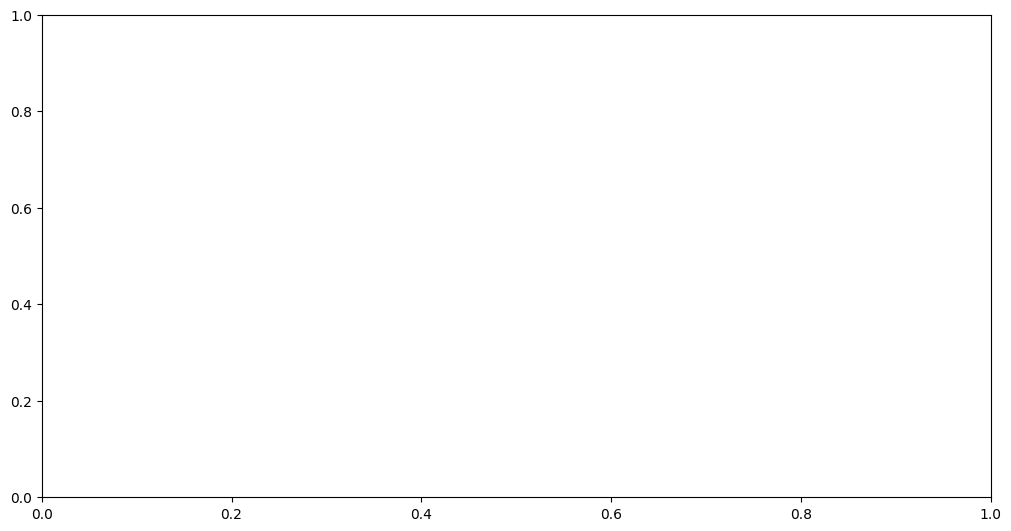

In [43]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series.index
  ys = predictions

  df2 = pd.DataFrame(latest_dates)

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Predictions')